In [33]:
# Importando as bibliotecas de leitura de dados tratados !importante
import pickle
import pandas as pd

with open('./zegodata.pkl', 'rb') as arquivo:
    previsores, classe = pickle.load(arquivo)
print(previsores, classe)

[[ 0.28330699 -0.30309707  0.          0.        ]
 [-0.05222055 -0.30309707  0.          0.        ]
 [-0.23412211 -0.30309707  0.          0.        ]
 ...
 [-0.51505896 -0.30309707  0.          0.        ]
 [-0.21795308  3.23103442  0.          0.        ]
 [-0.65855908 -0.30309707  0.          0.        ]] ['One Time Payment' 'One Time Payment' 'One Time Payment' ...
 'Fixed Autopay' 'One Time Payment' 'One Time Payment']


In [34]:
from sklearn.ensemble import RandomForestClassifier

# aqui estamos preparando nosso classificador, com um numero de estimativas, critério e estado da randomização, por padrão, as estimativas são 100 e critério por padrão é o gini
classificador = RandomForestClassifier(n_estimators=5, criterion='gini', random_state=0)
classificador.fit(previsores, classe)


RandomForestClassifier(n_estimators=5, random_state=0)

In [35]:
with open('./zegotestdata.pkl', 'rb') as arquivo:
    previsores_teste, classe_de_teste = pickle.load(arquivo)
previsao = classificador.predict(previsores_teste)
previsao

array(['One Time Payment', 'One Time Payment', 'One Time Payment', ...,
       'One Time Payment', 'One Time Payment', 'One Time Payment'],
      dtype=object)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

print(f'{accuracy_score(previsao, classe_de_teste):.2f}')
print(classification_report(previsao, classe_de_teste))

0.92
                  precision    recall  f1-score   support

   Fixed Autopay       0.16      0.54      0.25      1539
One Time Payment       0.99      0.93      0.96     68773
Variable Autopay       0.08      0.21      0.11       100

        accuracy                           0.92     70412
       macro avg       0.41      0.56      0.44     70412
    weighted avg       0.97      0.92      0.94     70412



0.9235783673237516

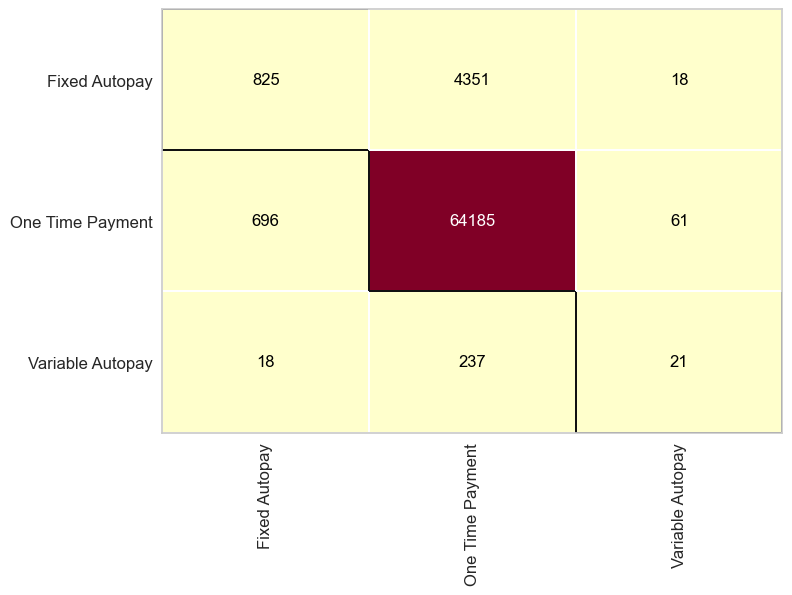

In [37]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(classificador)
cm.fit(previsores, classe)
cm.score(previsores_teste, classe_de_teste)